In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber = city.merge(ride, how='outer', on='city')
# Display the data table for preview
pyber_grouped = list(pyber.groupby(['type','city']))


In [2]:
#lists
rural_cities = []
urban_cities = []
suburban_cities = []

drivers_rural = []
drivers_urban = []
drivers_suburban = []

fair_rural = []
fair_urban = []
fair_suburban = []

rides_rural = []
rides_urban = []
rides_suburban = []

total_fair_rural = 0
total_fair_urban = 0
total_fair_suburban = 0

total_rides_rural = 0 
total_rides_urban = 0 
total_rides_suburban = 0

total_drivers_rural = 0
total_drivers_urban = 0
total_drivers_suburban = 0


In [3]:
# for key, item in pyber_grouped:
#     print(pyber_grouped.get_group(key), "\n\n")

for city in pyber_grouped:
    if city[0][0] == 'Rural':
        rural_cities.append(city)
        drivers_rural.append(city[1]['driver_count'].reset_index()['driver_count'][0])
        fair_rural.append(round(city[1]['fare'].mean(), 2))
        rides_rural.append(len(city[1]['ride_id']))
    elif city[0][0] == 'Urban':
        urban_cities.append(city)
        drivers_urban.append(city[1]['driver_count'].reset_index()['driver_count'][0])
        fair_urban.append(round(city[1]['fare'].mean(), 2))
        rides_urban.append(len(city[1]['ride_id']))
    else:
        suburban_cities.append(city)
        drivers_suburban.append(city[1]['driver_count'].reset_index()['driver_count'][0])
        fair_suburban.append(round(city[1]['fare'].mean(), 2))
        rides_suburban.append(len(city[1]['ride_id']))




In [4]:
# drivers_rural[0][-1:].reset_index()['driver_count'][0]

# print(pyber_grouped[1][1]['driver_count'].reset_index())

# print(pyber_grouped[1][1]['fare'].mean())

# drivers- rural:18 u:66 sub:36 fair- r: s:36 u: rides- r: s: u:

x = np.random.rand(40)




## Bubble Plot of Ride Sharing Data

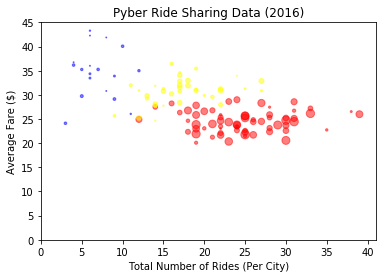

In [5]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

#urban
plt.scatter(rides_urban, fair_urban, s=drivers_urban*1000, alpha=0.5, c='red')
plt.scatter(rides_rural, fair_rural, s=drivers_rural*1000, alpha=0.5, c='blue')
plt.scatter(rides_suburban, fair_suburban, s=drivers_suburban*1000, alpha=0.5, c='yellow')
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.ylim([0.0, 45])
plt.xlim([0.0, 41])

plt.show()

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [6]:
# Show plot
plt.show()

## Total Fares by City Type

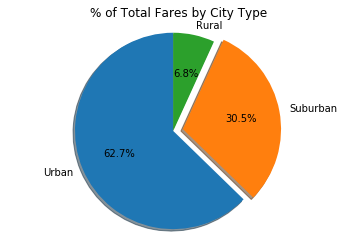

In [6]:
#need total fair by city type
for city in pyber_grouped:
    if city[0][0] == 'Rural':
        total_fair_rural += round(city[1]['fare'].sum(), 2)
    elif city[0][0] == 'Urban':
        total_fair_urban += round(city[1]['fare'].sum(), 2)
    else:
        total_fair_suburban += round(city[1]['fare'].sum(), 2)
        
total_fair = total_fair_rural + total_fair_suburban + total_fair_urban
        
# print(pyber_grouped[0][1]['fare'].sum())


    



# Calculate Type Percents

# Build Pie Chart

labels = 'Urban', 'Suburban', 'Rural'
sizes = [round(((total_fair_urban/total_fair)*100), 2), round(((total_fair_suburban/total_fair)*100), 2), round(((total_fair_rural/total_fair)*100), 2)]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Fares by City Type')
plt.show()
# Copy to clipboard


# Save Figure


In [8]:
print(rides_rural)

[10, 3, 6, 6, 6, 11, 12, 6, 4, 9, 8, 5, 5, 7, 8, 4, 6, 9]


In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

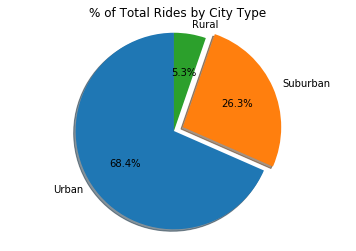

In [7]:
for city in pyber_grouped:
    if city[0][0] == 'Rural':
        total_rides_rural += len(city[1]['ride_id'])
    elif city[0][0] == 'Urban':
        total_rides_urban += len(city[1]['ride_id'])
    else:
        total_rides_suburban += len(city[1]['ride_id'])
        
total_rides = total_rides_rural + total_rides_suburban + total_rides_urban

labels = 'Urban', 'Suburban', 'Rural'
sizes = [round(((total_rides_urban/total_rides)*100), 2), round(((total_rides_suburban/total_rides)*100), 2), round(((total_rides_rural/total_rides)*100), 2)]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Rides by City Type')
plt.show()

# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

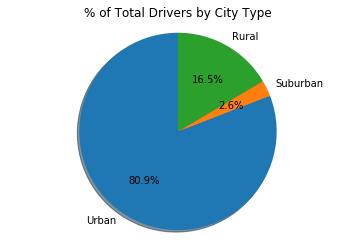

In [15]:
# Calculate Driver Percentages

for city in pyber_grouped:
    if city[0][0] == 'Rural':
        total_drivers_rural += city[1]['driver_count'].reset_index()['driver_count']
    elif city[0][0] == 'Urban':
        total_drivers_urban += city[1]['driver_count'].reset_index()['driver_count']
    else:
        total_drivers_suburban += city[1]['driver_count'].reset_index()['driver_count']
        
total_drivers = total_drivers_rural + total_drivers_urban + total_drivers_suburban
 
urban_pct = round(((total_drivers_urban/total_drivers)*100), 2)
suburban_pct = round(((total_drivers_rural/total_drivers)*100), 2)
rural_pct = round(((total_drivers_suburban/total_drivers)*100), 2)
    
    
labels = 'Urban', 'Suburban', 'Rural'
sizes = [urban_pct[0], suburban_pct[0], rural_pct[0]]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Drivers by City Type')

plt.show()

# Build Pie Charts

# Save Figure
